In [2]:
from typing import Union, List
import numpy as np

In [3]:
def walk(atoms: int,
         timesteps: np.ndarray,
         jump_size: int = 1,
         seed: np.random.mtrand.RandomState = np.random.RandomState()) -> np.ndarray:
    """
    Perform a random walk.

    :param atoms: number of atoms
    :param timesteps: the timestep values
    :param jump_size: size of jump
    :param seed: random seed source
    :return: cumulative sum of steps for walk
    """
    possible_moves = np.zeros((6, 3))
    j = 0
    for i in range(0, 6, 2):
        possible_moves[i, j] = jump_size
        possible_moves[i + 1, j] = -jump_size
        j += 1
    choices = seed.choice(len(range(len(possible_moves))), size=(atoms, len(timesteps)))
    steps = np.zeros((atoms, len(timesteps), 3))
    for i in range(steps.shape[0]):
        for j in range(steps.shape[1]):
            steps[i, j] = possible_moves[choices[i, j]]
    return steps

In [4]:
n_atoms = 124
dt = np.arange(1, 129, 1)

In [5]:
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:

# Using magnitude of displacement

n_runs = 1


int_scat = np.zeros((n_runs,len(dt)))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for i, n in enumerate(dt):
        disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                axis=1)
        disp_3d.append(disp)
        n_i = np.append(n_i, dt[-1] / n * n_atoms)
        int_scat[j,i] = np.mean(np.mean(np.exp(1j * np.linalg.norm(disp, axis = 2)), axis = 1))


# Normalising displacement across all 3 axis sqrt(x^2 + y^2 + z^2)

#Take the exponential of the imaginary unit times the magnitude of the displacement

#Take the mean of that over the number of the number of observations 

#Take the mean of that over the number of atoms


  0%|          | 0/1 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_27493/1764602205.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat[j,i] = np.mean(np.mean(np.exp(1j * np.linalg.norm(disp, axis = 2)), axis = 1))
100%|██████████| 1/1 [00:00<00:00, 27.97it/s]


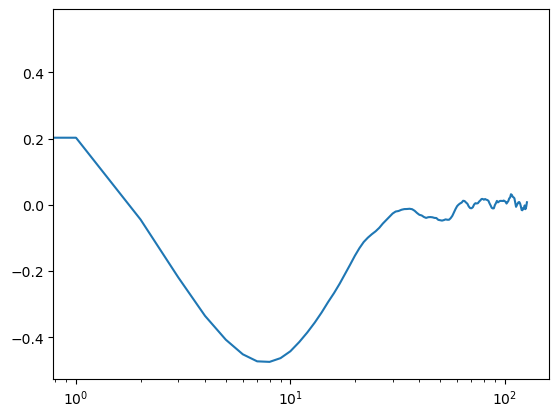

In [7]:
# Normalised displacement


plt.plot(int_scat.T)
plt.xscale('log')


In [8]:

# Applying to each displacement axis separately

n_runs = 1


int_scat = np.zeros((n_runs,len(dt),3))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for i, n in enumerate(dt):
        disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                axis=1)
        disp_3d.append(disp)
        n_i = np.append(n_i, dt[-1] / n * n_atoms)
        int_scat[j,i] = np.mean(np.mean(np.exp(1j * disp), axis=1),axis=0)


# Normalising displacement across all 3 axis sqrt(x^2 + y^2 + z^2)

#Take the exponential of the imaginary unit times the magnitude of the displacement

#Take the mean of that over the number of the number of observations 

#Take the mean of that over the number of atoms

  0%|          | 0/1 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_27493/1809501904.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat[j,i] = np.mean(np.mean(np.exp(1j * disp), axis=1),axis=0)
100%|██████████| 1/1 [00:00<00:00, 13.99it/s]


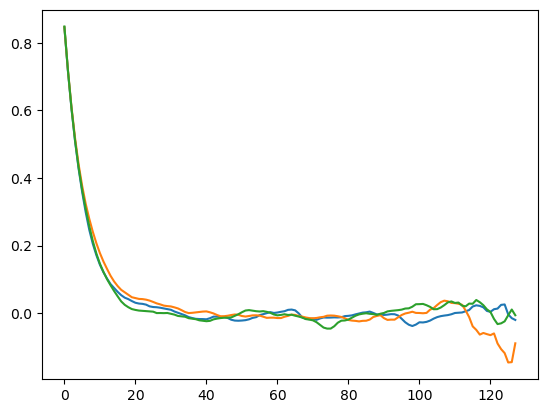

In [9]:
import matplotlib.pyplot as plt 

# Across 3 axis separartely

plt.plot((int_scat.T[0]))
plt.plot((int_scat.T[1]))
plt.plot((int_scat.T[2]))
#plt.xscale('log')

# Applying across a grid off q_points

In [ ]:
n_atoms = 124
dt = np.arange(1, 129, 1)

In [ ]:
def periodic_walk(atoms: int,
         timesteps: np.ndarray,
         jump_size: int = 1,
         seed: np.random.mtrand.RandomState = np.random.RandomState()) -> np.ndarray:
    """
    Perform a random walk.

    :param atoms: number of atoms
    :param timesteps: the timestep values
    :param jump_size: size of jump
    :param seed: random seed source
    :return: cumulative sum of steps for walk
    """
    possible_moves = np.zeros((6, 3))
    j = 0
    for i in range(0, 6, 2):
        possible_moves[i, j] = jump_size
        possible_moves[i + 1, j] = -jump_size
        j += 1
    choices = seed.choice(len(range(len(possible_moves))), size=(atoms, len(timesteps)))
    steps = np.zeros((atoms, len(timesteps), 3))
    for i in range(steps.shape[0]):
        for j in range(steps.shape[1]):
            steps[i, j] = possible_moves[choices[i, j]]
    return steps

In [11]:
from dynasor.qpoints import get_spherical_qpoints

cell  = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

q_points = get_spherical_qpoints(cell, q_max=2, max_points=100)

q_points.shape

(1, 3)

In [65]:
from dynasor.qpoints import get_spherical_qpoints

cell  = np.array([[10, 0, 0], [0, 10, 0], [0, 0, 10]])

q_points = get_spherical_qpoints(cell, q_max = 2)

q_points.shape

(35, 3)

In [66]:
np.dot(disp, q_points.T).shape

(124, 1, 35)

In [14]:
# None einsum implementation (slower)

n_runs = 10
box_size = [10,10,10]

int_scat_1 = np.zeros((n_runs,len(dt),len(q_points)))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for k in range(0,len(q_points)):
        for i, n in enumerate(dt):
            disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                    np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                    axis=1) % box_size # Modulus operator for periodic boundary conditions
            disp_3d.append(disp)
            n_i = np.append(n_i, dt[-1] / n * n_atoms)
            int_scat_1[j,i,k] = np.mean(np.mean(np.exp(1j * np.dot(disp, q_points[k])), axis = 1))

  0%|          | 0/10 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_27493/1981102849.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat_1[j,i,k] = np.mean(np.mean(np.exp(1j * np.dot(disp, q_points[k])), axis = 1))
100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


In [16]:
# einsum dot product improvement


n_runs = 1000


int_scat = np.zeros((n_runs,len(dt),len(q_points)))

for j in tqdm(range(n_runs)):
    steps = walk(n_atoms, dt, seed=np.random.RandomState(j))
    cum_steps = np.cumsum(steps, axis=1)
    disp_3d = []
    n_i = np.array([])
    for i, n in enumerate(dt):
        disp = np.concatenate([cum_steps[:, np.newaxis, i],
                                np.subtract(cum_steps[:, i + 1:], cum_steps[:, :-(i + 1)])],
                                axis=1)
        disp_3d.append(disp)
        n_i = np.append(n_i, dt[-1] / n * n_atoms)
        int_scat[j,i,:] = np.mean(np.mean(np.exp(1j*np.einsum('ijk,lk->ijl', disp, q_points)), axis = 1), axis = 0)

  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/8y/ppth74md47d_wyx004p8vy6h0000gp/T/ipykernel_27493/2631184572.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  int_scat[j,i,:] = np.mean(np.mean(np.exp(1j*np.einsum('ijk,lk->ijl', disp, q_points)), axis = 1), axis = 0)
 45%|████▌     | 451/1000 [04:57<06:12,  1.48it/s]

In [29]:
#np.save('1000_run_rw_35qpoints.npy', int_scat)

import ipywidgets as widgets

In [32]:
chosen_q_point = 15

def plotting_widg(chosen_q_point):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,5))
    ax1.set_title('Uncertainty propogation vs timestep')
    ax1.plot(int_scat[:,:,chosen_q_point].T, 'b', alpha = 0.2)
    ax2.set_title('Standard deviation as a function of timestep')
    ax2.plot(dt,np.std(int_scat[:,:,chosen_q_point], axis = 0))
    cov = np.cov(int_scat[:,:,chosen_q_point].T)
    ax3.contourf(*np.meshgrid(dt, dt), cov, levels=20)
    fig.colorbar(ax3.contourf(*np.meshgrid(dt, dt), cov, levels=20))
    ax3.set_title('Covariance matrix as a function of timestep')
    fig.suptitle(f'Q-point: {chosen_q_point}')

widgets.interact(plotting_widg, chosen_q_point = widgets.IntSlider(min=0, max=34, step=1, value=15))

interactive(children=(IntSlider(value=15, description='chosen_q_point', max=34), Output()), _dom_classes=('wid…

<function __main__.plotting_widg(chosen_q_point)>

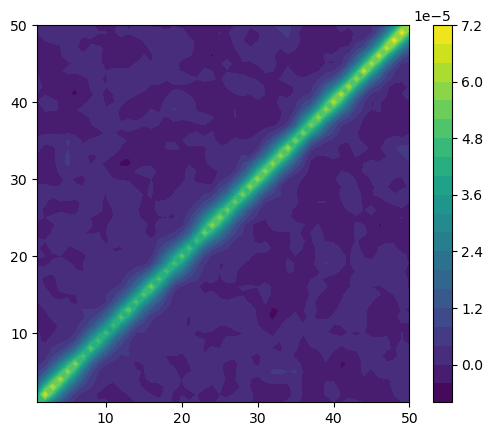

In [368]:
cov = np.cov(int_scat[:,:,10].T)

cov = cov[0:50,0:50]

plt.subplots(figsize=(6, 4.9))
plt.contourf(*np.meshgrid(dt[0:50], dt[0:50]), cov, levels=20)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Mean STD as a function of q_point')

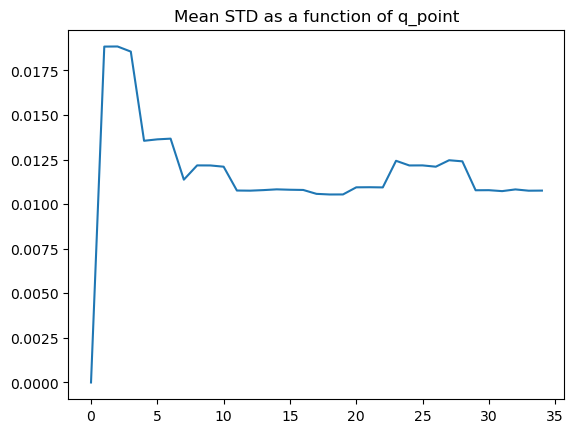

In [345]:
plt.plot(range(0,35),np.mean(np.std(int_scat[:,:,:], axis = 0), axis = 0))
plt.title('Mean STD as a function of q_point')

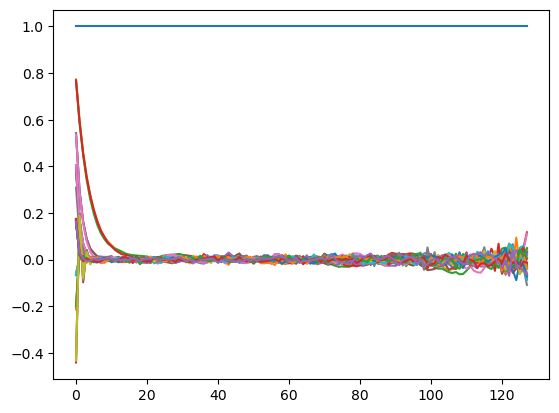

In [34]:
plt.plot(int_scat[7,:,:])

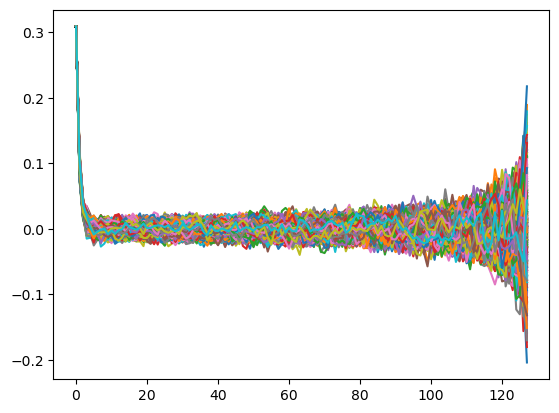

In [114]:
plt.plot(int_scat[:,:,7].T)
plt.show()

In [ ]:
n_atoms = 124
dt = np.arange(1, 129, 1)

In [28]:
def anticorrelated_walk(atoms: int,
                        timesteps: np.ndarray,
                        jump_size: int = 1,
                        seed: Union[np.random.mtrand.RandomState, None] = None) -> np.ndarray:
    """
    Perform anti correlated random walk.

    :param atoms: number of atoms
    :param timesteps: the timestep values
    :param jump_size: size of jump
    :param seed: random seed source
    :return: cumulative sum of steps for walk
    """
    possible_moves = np.zeros((6, 3))
    j = 0
    for i in range(0, 6, 2):
        possible_moves[i, j] = jump_size
        possible_moves[i + 1, j] = -jump_size
        j += 1
    possible_moves_store = np.copy(possible_moves)
    choices = seed.choice(len(range(len(possible_moves))), size=(atoms, len(timesteps)))
    steps = np.zeros((atoms, len(timesteps), 3))
    for i in range(steps.shape[0]):
        for j in range(steps.shape[1]):
            steps[i, j] = possible_moves[choices,]
            possible_moves = np.append(possible_moves_store, steps[i, j])
            possible_moves = np.append(possible_moves, steps[i, j])
            possible_moves = np.append(possible_moves, steps[i, j]).reshape(9, 3)
            choices = seed.choice(len(range(len(possible_moves))))
    cum_steps = np.cumsum(steps, axis=1)
    return cum_steps

In [ ]:
plt.plot(int_scat.var(0))

In [ ]:
plt.imshow(np.cov(int_scat.T))

In [12]:
int_scat = []

for x in range(len(disp_3d)):
    int_scat.append(np.mean(np.mean(np.exp(1j * np.linalg.norm(disp_3d[x], axis = 2)), axis = 1)))


In [ ]:
plt.scatter(dt,np.fft.fft(int_scat))

In [21]:
from scipy.stats import chi2

In [22]:
f = chi2.fit(msd, floc=0)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(msd, bins=100, density=True)
x = np.linspace(np.min(msd), np.max(msd), 1000)
plt.plot(x, chi2(*f).pdf(x), 'k-')

In [ ]:
f